In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/tyco/Desktop/MADS/sanovo_19052025/data/processed/cleaned_data.csv')
df.head()

,MerId,MerType,MerDate,MerNumber,MerSubNumber,MerData1,MerData2,MerData3,MerData4,MerData5,MerMinId,MerText,MerDeviceType,MerDeviceNumber,MerPriority,MerDateDay
0,11897185,7,2025-01-30 10:22:00,10,22,181.0,180.0,90.0,NaN,NaN,4620,NaN,0,0,0,2025-01-30
1,11897186,21,2025-01-30 10:21:42,460,12,1.0,22.0,41.0,NaN,NaN,4620,NaN,0,0,0,2025-01-30
2,11897187,23,2025-01-30 10:21:56,460,12,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0,2025-01-30
3,11897188,21,2025-01-30 10:21:56,460,12,1.0,22.0,41.0,NaN,NaN,4620,NaN,0,0,0,2025-01-30
4,11897189,23,2025-01-30 10:21:57,460,12,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0,2025-01-30


I want to see the correlation between 98 and the machine stops. So an increase in 98 warnings means an increase in machine stops

In [32]:
df_agg = df.groupby('MerDateDay').apply(
    lambda x: pd.Series({
        'Total warnings 98': ((x['MerType'] == 22) & (x['MerNumber'] == 98)).sum(),
        'Total errors 96': ((x['MerType'] == 21) & (x['MerNumber'] == 96)).sum(),
        'Total stops lane related': ((x['MerType'] == 8) & (x['MerNumber'] == 0) & (x['MerSubNumber'] == 2)).sum()
        # 'Total stops': ((x['MerType'] == 8) & (x['MerNumber'] == 0)).sum() * 100
    })
)

df_agg.head()

/var/folders/pt/00xl4yzd64s0vbx9w9tzh94m0000gn/T/ipykernel_34004/1521156837.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_agg = df.groupby('MerDateDay').apply(


,Total warnings 98,Total errors 96,Total stops lane related
MerDateDay,,,
2025-01-30,5737,533,413
2025-01-31,6693,351,247
2025-02-03,2245,395,356
2025-02-04,5632,413,301
2025-02-05,5235,419,385


In [33]:
df_agg.corr()['Total stops lane related']

Total warnings 98           0.316794
Total errors 96             0.952670
Total stops lane related    1.000000
Name: Total stops lane related, dtype: float64

<Axes: xlabel='MerDateDay'>

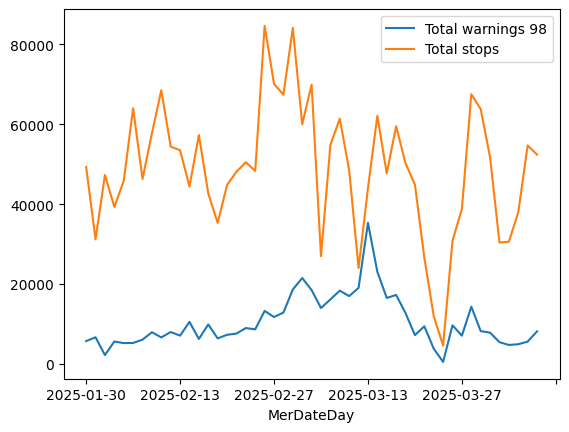

In [14]:
df_agg.plot(x='MerDateDay', y=['Total warnings 98', 'Total stops'], kind='line')